# Project 2 [Computer vision] Implement ML models to distinguish between fashion items (e.g., shirts, sneakers, bags) in images. 
### Group 2: Avezzù Irene e Nworah Bortot Ivana


1. Train different ML models among those seen in class to classify the images of this dataset https://www.kaggle.com/datasets/zalando-research/fashionmnist;
2. Do not use all the explained classifiers but try to reason on the most suitable ones for this task;
3. Optimize their hyperparameters;
4. Use also an MLP classifier described here https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. You don’t have to fully understand how it works or optimize its hyperparameters, just use it as a black box.
5. Compute the F1 measure for each used classifier;
6. Plot the roc and precision/recall curves and compute the area under the curve for each used classifier;
7. Use K-means (with K equal to the number of classes) to cluster the images and compute the F1 measure;
8. Compare and discuss the results of points 5, 6, 7.

### 1. Train different ML models among those seen in class to classify the images of the dataset

Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore') 

Load training data

In [2]:
# load training dataset
data_train = pd.read_csv('archive/fashion-mnist_train.csv', header=0) #, nrows=100)

data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Load testing data

In [3]:
#load testing dataser
data_test = pd.read_csv('archive/fashion-mnist_test.csv', header=0)

data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Comparing the number of samples in the train and test datasets

Train dataset percentage: 85.71%
Test dataset percentage: 14.29%


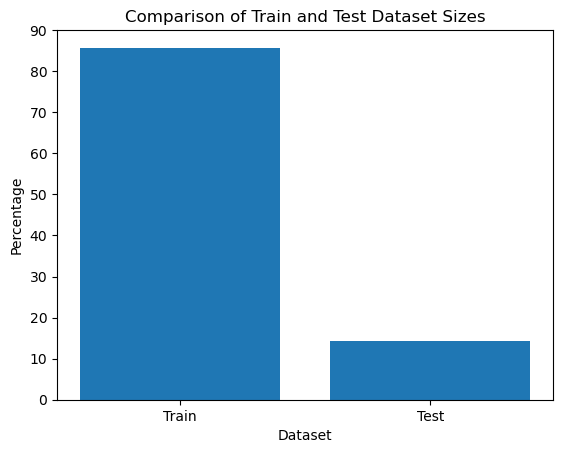

In [4]:
# Get the number of samples in the train and test datasets
train_size = len(data_train)
test_size = len(data_test)

# Calculate the percentage of the train and test sizes
train_percentage = (train_size / (train_size + test_size)) * 100
test_percentage = (test_size / (train_size + test_size)) * 100

# Print the actual percentage for each dataset
print("Train dataset percentage: {:.2f}%".format(train_percentage))
print("Test dataset percentage: {:.2f}%".format(test_percentage))

# Create a bar plot to compare the dataset sizes
plt.bar(['Train', 'Test'], [train_percentage, test_percentage])
plt.xlabel('Dataset')
plt.ylabel('Percentage')
plt.title('Comparison of Train and Test Dataset Sizes')
plt.show()

Check for null values

In [5]:
# check for null values
data_train = data_train.replace(['?', ',', '.'], np.NaN) #remove ? and , and . as missing values

print('Number of missing values before cleaning:')
for col in data_train.columns:
    print(f'\t{col}: {data_train[col].isna().sum()}')

Number of missing values before cleaning:
	label: 0
	pixel1: 0
	pixel2: 0
	pixel3: 0
	pixel4: 0
	pixel5: 0
	pixel6: 0
	pixel7: 0
	pixel8: 0
	pixel9: 0
	pixel10: 0
	pixel11: 0
	pixel12: 0
	pixel13: 0
	pixel14: 0
	pixel15: 0
	pixel16: 0
	pixel17: 0
	pixel18: 0
	pixel19: 0
	pixel20: 0
	pixel21: 0
	pixel22: 0
	pixel23: 0
	pixel24: 0
	pixel25: 0
	pixel26: 0
	pixel27: 0
	pixel28: 0
	pixel29: 0
	pixel30: 0
	pixel31: 0
	pixel32: 0
	pixel33: 0
	pixel34: 0
	pixel35: 0
	pixel36: 0
	pixel37: 0
	pixel38: 0
	pixel39: 0
	pixel40: 0
	pixel41: 0
	pixel42: 0
	pixel43: 0
	pixel44: 0
	pixel45: 0
	pixel46: 0
	pixel47: 0
	pixel48: 0
	pixel49: 0
	pixel50: 0
	pixel51: 0
	pixel52: 0
	pixel53: 0
	pixel54: 0
	pixel55: 0
	pixel56: 0
	pixel57: 0
	pixel58: 0
	pixel59: 0
	pixel60: 0
	pixel61: 0
	pixel62: 0
	pixel63: 0
	pixel64: 0
	pixel65: 0
	pixel66: 0
	pixel67: 0
	pixel68: 0
	pixel69: 0
	pixel70: 0
	pixel71: 0
	pixel72: 0
	pixel73: 0
	pixel74: 0
	pixel75: 0
	pixel76: 0
	pixel77: 0
	pixel78: 0
	pixel79: 0
	pixel80:

	pixel714: 0
	pixel715: 0
	pixel716: 0
	pixel717: 0
	pixel718: 0
	pixel719: 0
	pixel720: 0
	pixel721: 0
	pixel722: 0
	pixel723: 0
	pixel724: 0
	pixel725: 0
	pixel726: 0
	pixel727: 0
	pixel728: 0
	pixel729: 0
	pixel730: 0
	pixel731: 0
	pixel732: 0
	pixel733: 0
	pixel734: 0
	pixel735: 0
	pixel736: 0
	pixel737: 0
	pixel738: 0
	pixel739: 0
	pixel740: 0
	pixel741: 0
	pixel742: 0
	pixel743: 0
	pixel744: 0
	pixel745: 0
	pixel746: 0
	pixel747: 0
	pixel748: 0
	pixel749: 0
	pixel750: 0
	pixel751: 0
	pixel752: 0
	pixel753: 0
	pixel754: 0
	pixel755: 0
	pixel756: 0
	pixel757: 0
	pixel758: 0
	pixel759: 0
	pixel760: 0
	pixel761: 0
	pixel762: 0
	pixel763: 0
	pixel764: 0
	pixel765: 0
	pixel766: 0
	pixel767: 0
	pixel768: 0
	pixel769: 0
	pixel770: 0
	pixel771: 0
	pixel772: 0
	pixel773: 0
	pixel774: 0
	pixel775: 0
	pixel776: 0
	pixel777: 0
	pixel778: 0
	pixel779: 0
	pixel780: 0
	pixel781: 0
	pixel782: 0
	pixel783: 0
	pixel784: 0


There are no none values, so there is no need to remove instances of the dataset.  
We don't drop any column because each represents a pixel in the image.  
As the data is already numerical, vectorization is unnecessary.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics

Train model

In [7]:
# Split the dataset into features (X) and labels (y)
X = data_train.iloc[:, 1:].values
y = data_train.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We can get a visual representation of the images represented by the pixels by plotting some examples by reshaping each row into a 28x28 array (28x28 = 784 which is the number of columns in the dataset).

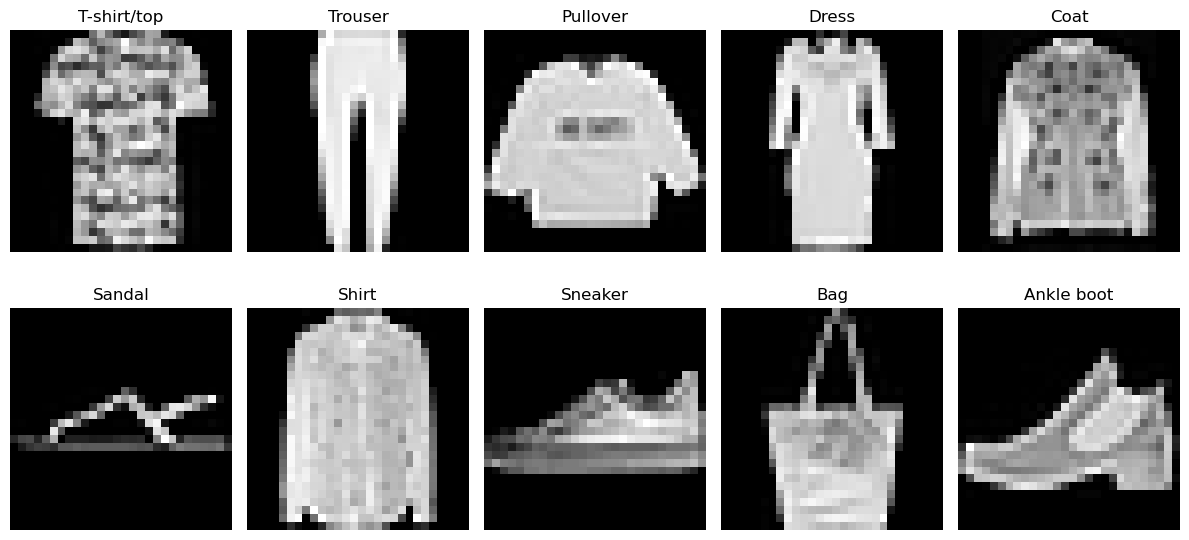

In [8]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
axes = axes.flatten()

for i in range(10):
    image = X[y == i][0].reshape(28, 28)
    
    # Plot the image
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(labels[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Calculate data distribution and class imbalance

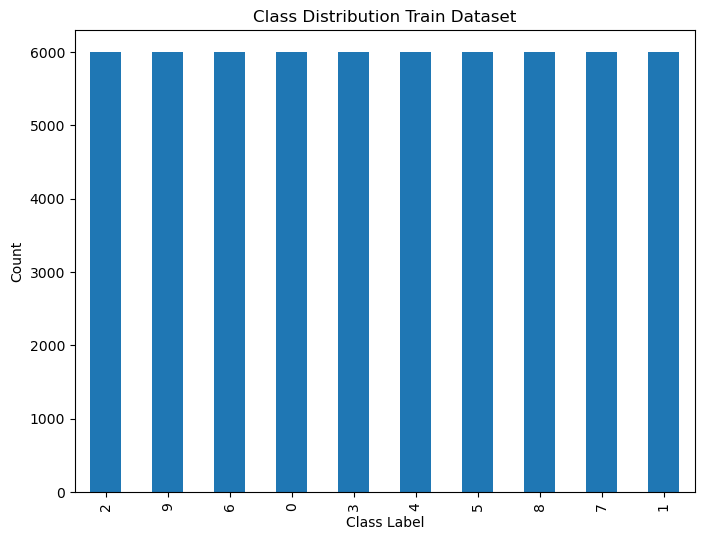

Class Counts:
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64


In [9]:
# Class distribution of the training dataset

class_counts = data_train['label'].value_counts() # count the occurrences of each class label

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution Train Dataset')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print("Class Counts:")
print(class_counts)

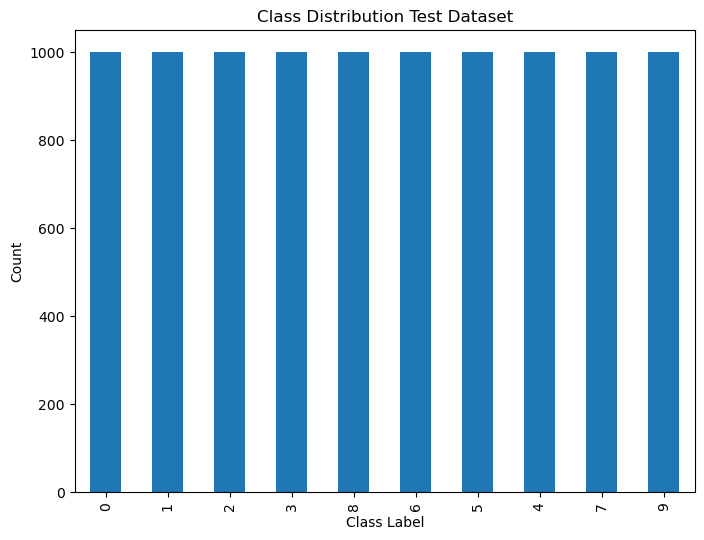

Class Counts:
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64


In [10]:
# Class distribution of the testing dataset
class_counts = data_test['label'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution Test Dataset')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print("Class Counts:")
print(class_counts)

The dataset is well-balanced. Each class has the same number of samples:
- the train dataset has 6000 samples for each class
- the test dataset has 1000 samples for each class

### 2. Do not use all the explained classifiers but try to reason on the most suitable ones for this task

SVM, KNN and Naive Bayes are good classifier for the Fashion MNIST dataset because they can handle high-dimensional data.  
In the dataset, the majority of the data features are pixel, and so they are continuous. Naive Bayes classifiers works better with discrete and categorical features, so we decided to exclude it.  
SVM is good at capturing complex relationships in the data and handling high-dimensional feature spaces effectively.   
However, KNN can handle data while requiring lower computational resources compared to the SVM. We chose to use KNN because it has the performance we required and is more efficient in computational times.

### 3. Optimize their hyperparameters

We compute the performance metrics of the KNN classifier, optimizing its hyperparameter (number of neighbours)

In [11]:
# optimize hyperparameters of the KNN

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

knn = KNeighborsClassifier()

# Define the range of hyperparameters to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the KNN classifier using the best hyperparameters
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

# Evaluate the best model on the validation set
y_pred_test = knn_best.predict(X_test)
f1_val = f1_score(y_test, y_pred_test, average='macro')

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("F1 Score:", f1_val) # for validation
print("Grid Search Results:")
print(pd.DataFrame(grid_search.cv_results_))

Best Hyperparameters: {'n_neighbors': 7}
Best Score: 0.8500416666666666
F1 Score: 0.8557048651994517
Grid Search Results:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.078753      0.017589         9.429504        0.338285   
1       0.097185      0.018200        12.348335        1.174082   
2       0.089473      0.015392        18.859344        1.851536   
3       0.110058      0.019863        20.443566        0.898599   
4       0.115402      0.021074        21.354599        1.214340   

  param_n_neighbors              params  split0_test_score  split1_test_score  \
0                 1  {'n_neighbors': 1}           0.845521           0.848854   
1                 3  {'n_neighbors': 3}           0.853229           0.853437   
2                 5  {'n_neighbors': 5}           0.852292           0.857292   
3                 7  {'n_neighbors': 7}           0.854167           0.857917   
4                 9  {'n_neighbors': 9}           0.852812           0

### 4. Use also an MLP classifier

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Split the dataset into features (X) and labels (y)
X = data_train.iloc[:, 1:].values
y = data_train.iloc[:, 0].values

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train) # Train the classifier

# Evaluate in the validation set
y_pred_val = model_mlp.predict(X_val)
f1_mlp = f1_score(y_val, y_pred_val, average='macro')

print("Validation F1 Score (MLP):", f1_mlp)

Validation F1 Score (MLP): 0.8699637421249106


### 5-6. Compute the F1 measure, plot the roc and precision/recall curves and compute the area under the curve for each used classifier

We computed the F1 measure, plot the roc and precision/recall curves and the area under the curve of the KNN classifier and the MLP classifier. For all classifiers, we have also computed the accuracy.

#### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
# predictions
y_pred_knn = model_knn.predict(X_test)

In [15]:
# accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)

Accuracy of KNN: 0.8493333333333334


In [16]:
#f1
f1_knn = metrics.f1_score(y_test, y_pred_knn, average='macro')
print("F1 score of KNN:", f1_knn)

F1 score of KNN: 0.8493399008894844


Prec-rec curve

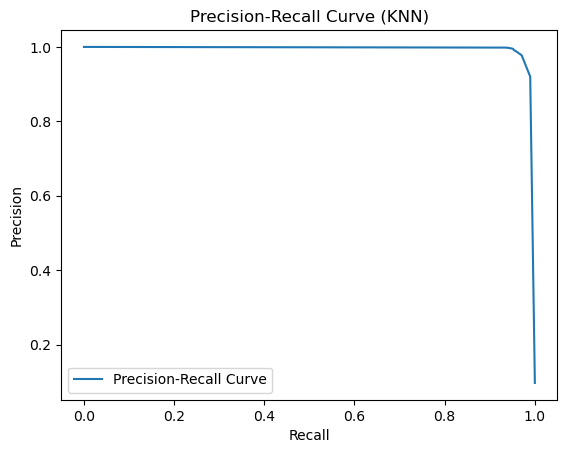

In [17]:
#prec-rec curve

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Fit the classifier and obtain predicted probabilities
probas_pred = model_knn.predict_proba(X_test)
probas_positive = probas_pred[:, 1]

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, probas_positive, pos_label=1)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.legend()
plt.show()

Roc curve

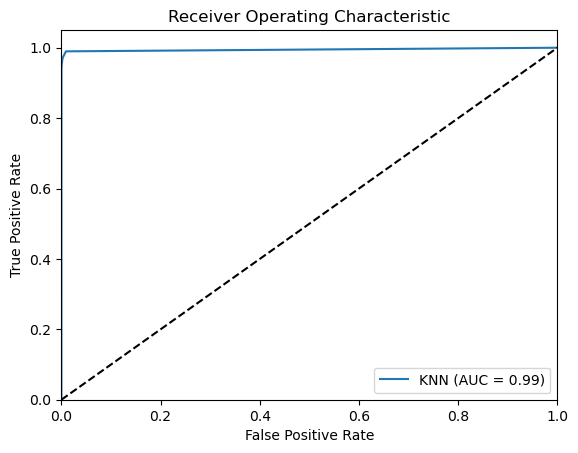

In [18]:
#roc curve

from sklearn.metrics import roc_curve, auc

# Obtain predicted probabilities for the positive class
y_score_knn = model_knn.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_score_knn, pos_label=1)

# Calculate the area under the ROC curve
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve for KNN
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % roc_auc_knn)

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Area under the curve

In [19]:
#auc

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate predicted probabilities for all classes
y_scores_knn = model_knn.predict_proba(X_test)

auc_knn = roc_auc_score(y_test_bin, y_scores_knn, multi_class='ovr')
print("Area under the curve of KNN:", auc_knn)

Area under the curve of KNN: 0.9732417946433767


#### MLP

In [20]:
# predictions
y_pred_mlp = model_mlp.predict(X_test)

In [21]:
# accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of MLP:", accuracy_mlp)

Accuracy of MLP: 0.8583333333333333


In [22]:
#f1
f1_mlp = metrics.f1_score(y_test, y_pred_mlp, average='macro')
print("F1 score of MLP:", f1_mlp)

F1 score of MLP: 0.8581020933512447


Prec-rec curve

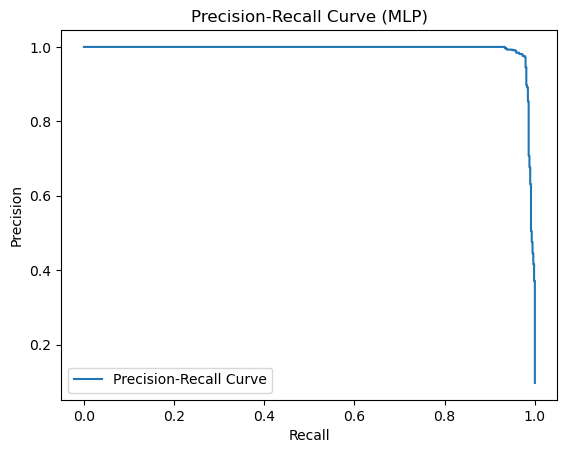

In [23]:
# prec-rec curve

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Fit the classifier and obtain predicted probabilities
probas_pred = model_mlp.predict_proba(X_test)
probas_positive = probas_pred[:, 1]

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, probas_positive, pos_label=1)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (MLP)')
plt.legend()
plt.show()

Roc curve

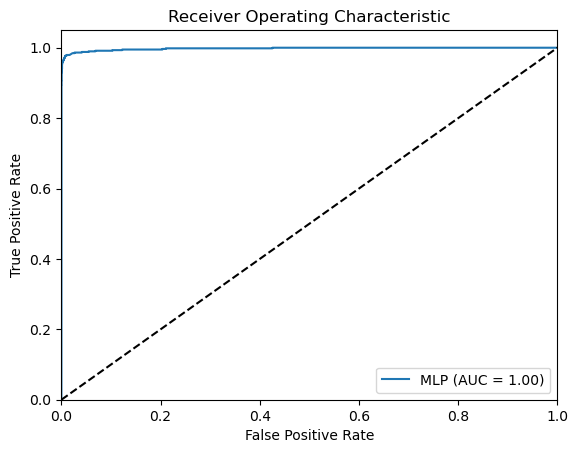

In [24]:
# roc curve

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)

# Predicted probabilities for the positive class
y_score_mlp = mlp_classifier.predict_proba(X_test)[:, 1]

# False positive rate, true positive rate, and thresholds
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_score_mlp, pos_label=1)

# Area under the ROC curve
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot the ROC curve for MLP
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.2f)' % roc_auc_mlp)

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Area under the curve

In [25]:
# auc

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate predicted probabilities for all classes
y_score_mlp = model_mlp.predict_proba(X_test)

auc_mlp = roc_auc_score(y_test_bin, y_score_mlp, multi_class='ovr')
print("Area under the curve of MLP:", auc_mlp)

Area under the curve of MLP: 0.9852667733633286


### 7. Use K-means (with K equal to the number of classes) to cluster the images and compute the F1 measure

In [26]:
# Cluster with k-mean
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

X = data_test.values 
number_of_clusters = [2, 3, 4, 5, 6, 7] # We test the clustering with different possible number of clusters
predicted_belonging_cluster = []

for K in number_of_clusters: 
    clustering = KMeans(n_clusters=K)
    belonging_cluster = clustering.fit_predict(X)
    predicted_belonging_cluster.append(belonging_cluster)
    
    print(f"\nNumber of clusters: {K}")
    print("Cluster centers: ")
    print(clustering.cluster_centers_)
    print("Cluster to which element belongs: ")
    print(belonging_cluster)


Number of clusters: 2
Cluster centers: 
[[3.10702216e+00 1.87758167e-04 1.40818626e-02 ... 3.06365002e+00
  6.38941044e-01 6.62786331e-02]
 [6.08729140e+00 6.41848524e-04 5.99058622e-03 ... 1.94672657e+00
  6.18741977e-01 6.48267009e-02]]
Cluster to which element belongs: 
[0 0 1 ... 0 0 0]

Number of clusters: 3
Cluster centers: 
[[ 4.50300247e+00  1.05969622e-03  3.46167432e-02 ...  5.93995055e+00
   1.19745673e+00  1.20805369e-01]
 [ 2.09498264e+00 -1.08420217e-18  1.26222783e-03 ...  1.43893973e-01
   3.40801515e-02  1.11022302e-16]
 [ 6.40325000e+00  2.50000000e-04  2.50000000e-04 ...  2.03600000e+00
   6.99250000e-01  7.85000000e-02]]
Cluster to which element belongs: 
[1 1 2 ... 0 0 0]

Number of clusters: 4
Cluster centers: 
[[8.15249589e+00 1.09709270e-03 1.48107515e-02 ... 4.79539221e+00
  1.91442677e+00 2.21064180e-01]
 [3.39471669e+00 3.82848392e-04 2.71822358e-02 ... 4.25918836e+00
  5.10336907e-01 4.70903522e-02]
 [5.43351994e+00 3.49895031e-04 3.49895031e-04 ... 1.86564

In [27]:
data_to_cluster = data_test.copy()
data_to_cluster = data_to_cluster.drop('label', axis =1)

data_test.info()
data_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 59.8 MB


In [28]:
# K-Means requires unlabelled data in order to run, so we take the date without labels to the clustering
X = data_to_cluster.values 
number_of_clusters = [2, 3, 4, 5, 6, 7] #we test the clustering with different possible number of clusters
predicted_belonging_cluster = [] #nullcontext, nullcontext, nullcontext, nullcontext, nullcontext, nullcontext]

for K in number_of_clusters: 
    clustering = KMeans(n_clusters=K)
    belonging_cluster = clustering.fit_predict(X)
    predicted_belonging_cluster.append(belonging_cluster)
    
    print(f"\nNumber of clusters: {K}")
    print("Cluster centers: ")
    print(clustering.cluster_centers_)
    print("Cluster to which element belongs: ")
    print(belonging_cluster)


Number of clusters: 2
Cluster centers: 
[[6.41848524e-04 5.99058622e-03 3.61574668e-02 ... 1.94672657e+00
  6.18741977e-01 6.48267009e-02]
 [1.87758167e-04 1.40818626e-02 6.60908750e-02 ... 3.06365002e+00
  6.38941044e-01 6.62786331e-02]]
Cluster to which element belongs: 
[1 1 0 ... 1 1 1]

Number of clusters: 3
Cluster centers: 
[[ 2.50125063e-04  2.50125063e-04  7.00350175e-03 ...  2.03701851e+00
   6.99599800e-01  7.85392696e-02]
 [ 1.05894811e-03  3.45923050e-02  1.54606424e-01 ...  5.93575715e+00
   1.19661137e+00  1.20720085e-01]
 [-1.08420217e-18  1.26222783e-03  1.73556327e-02 ...  1.43893973e-01
   3.40801515e-02  9.71445147e-17]]
Cluster to which element belongs: 
[2 2 0 ... 1 1 1]

Number of clusters: 4
Cluster centers: 
[[1.09709270e-03 1.48107515e-02 6.80197477e-02 ... 4.79539221e+00
  1.91442677e+00 2.21064180e-01]
 [4.33680869e-19 1.47819660e-03 6.65188470e-03 ... 8.01921656e-02
  1.40428677e-02 9.71445147e-17]
 [3.49895031e-04 3.49895031e-04 1.50454864e-02 ... 1.86564

Elbow Method

Text(0.5, 1.0, 'Elbow Method Curve (10 clusters)')

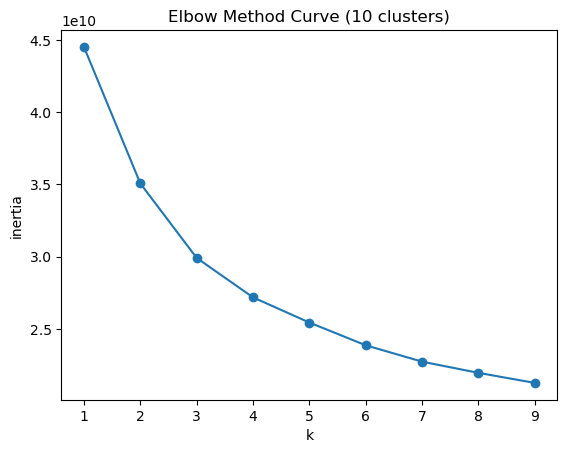

In [29]:
#plot with 10 clusters
plt.figure()
inertia = []
number_of_clusters = [i for i in range(1, 10)]
for K in number_of_clusters:
    clustering = KMeans(n_clusters=K)
    clustering.fit(X)
    inertia.append(clustering.inertia_)
    
plt.plot(number_of_clusters, inertia, "o-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Elbow Method Curve (10 clusters)")

In checking the inertia values in a range from 1 to 10 clusters, the elbow method didn't show a distinguished elbow point, making it challenging to determine the optimal number of clusters. To explore the issue further, additional tests with 20 and 50 clusters are performed.

Text(0.5, 1.0, 'Elbow Method Curve (20 clusters)')

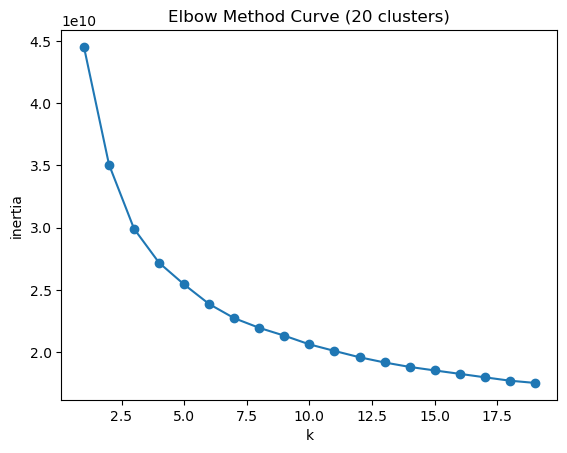

In [30]:
#plot with 20 clusters
plt.figure()
inertia = []
number_of_clusters = [i for i in range(1, 20)]
for K in number_of_clusters:
    clustering = KMeans(n_clusters=K)
    clustering.fit(X)
    inertia.append(clustering.inertia_)
    
plt.plot(number_of_clusters, inertia, "o-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Elbow Method Curve (20 clusters)")

Text(0.5, 1.0, 'Elbow Method Curve (50 clusters)')

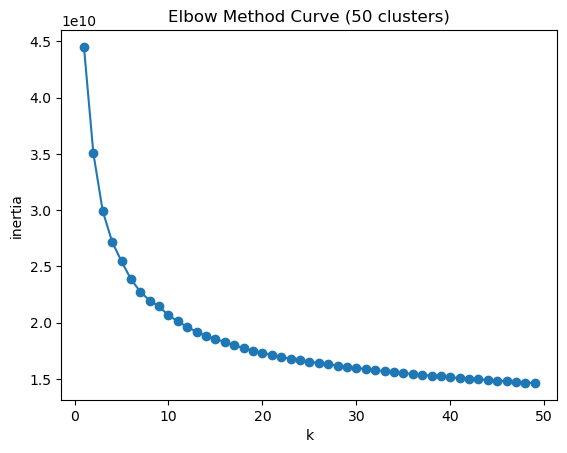

In [31]:
#plot with 50 clusters
plt.figure()
inertia = []
number_of_clusters = [i for i in range(1, 50)]
for K in number_of_clusters:
    clustering = KMeans(n_clusters=K)
    clustering.fit(X)
    inertia.append(clustering.inertia_)
    
plt.plot(number_of_clusters, inertia, "o-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Elbow Method Curve (50 clusters)")

When testing with 20 and 50 clusters, the presence of an elbow point became more clear, although it is still not easy to define. This suggests that a higher number of clusters might help to determine the elbow point.

Compute F1 measure

In [32]:
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

# Perform K-means clustering
clustering = KMeans(n_clusters=K)
predicted_clusters = clustering.fit_predict(X_test)

# Compute the F1 measure
f1 = f1_score(y_test, predicted_clusters, average='macro')

print("F1 Score:", f1)

F1 Score: 0.007490284633891748


### 8. Compare and discuss the results of points 5, 6, 7:
5. Compute the F1 measure for each used classifier;
6. Plot the roc and precision/recall curves and compute the area under the curve for each used classifier;
7. Use K-means (with K equal to the number of classes) to cluster the images and compute the F1 measure;

The F1 measures for the KNN and MLP classifiers are 0.849 and 0.858, respectively. Both classifiers have high F1 scores. This indicates a good overall of precision and recall. However, the MLP classifier has a slightly higher F1 score, suggesting it may have a slight advantage in capturing the balance between precision and recall compared to the KNN classifier.

Both the precision-recall curves and ROC curves for the KNN and MLP classifiers are similar and have optimal performance. Both classifiers are effective in distinguishing between different classes.

The F1 score for the K-means clustering with the number of clusters equal to the number of classes is 0.007. This low F1 score indicates that the clustering algorithm is not effective in accurately assigning data points to their corresponding classes. It suggests that the K-means clustering approach may not be suitable for this particular classification task.